# Random Biased Savings with Theoretical Distributions

In this section we perform some experiments testing the modified savings algorithm with the candidate selection methods based on randomized biased algorithms. The purpose of this notebook is to illustrate the construction and improvement of the repeated execution of stochastic algorithms versus the original deterministic algorithm.

The relevant analyses on all the problems tabulated in the benchmarks table will be carried out independently of this section, which is only intended to show graphically the solutions reached by the algorithms.

## Import dependencies

In [1]:
from _savings_algorithm import *
from _biased_random_theorical_distributions import *

## Triangular Distribution

In [2]:
def rand_biased_tri_savings(instance_name):
    depot, nodes, veh_capacity = read_nodes(instance_name)
    build_initial_edges(depot, nodes)
    savings_list = compute_savings_list(nodes)
    solution = create_dummy_solution(nodes)
    
    while len(savings_list) > 0:
        n = len(savings_list) - 1 
        position = get_random_triangular_position(n)
        candidate = savings_list[position]
        merge_routes(candidate, solution, depot, veh_capacity)
        savings_list.remove(savings_list[position])

    return solution


def test_triangular(instance_name, iterations):
    best = None
    for i in range(iterations):
        solution = rand_biased_tri_savings(instance_name)
        cost = solution.cost
        try:
            if cost < best.cost:
                best = solution
        except:
            best = solution
        #print('solution_{} --- cost = {}'.format(i, cost))
    return best


/home/martin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


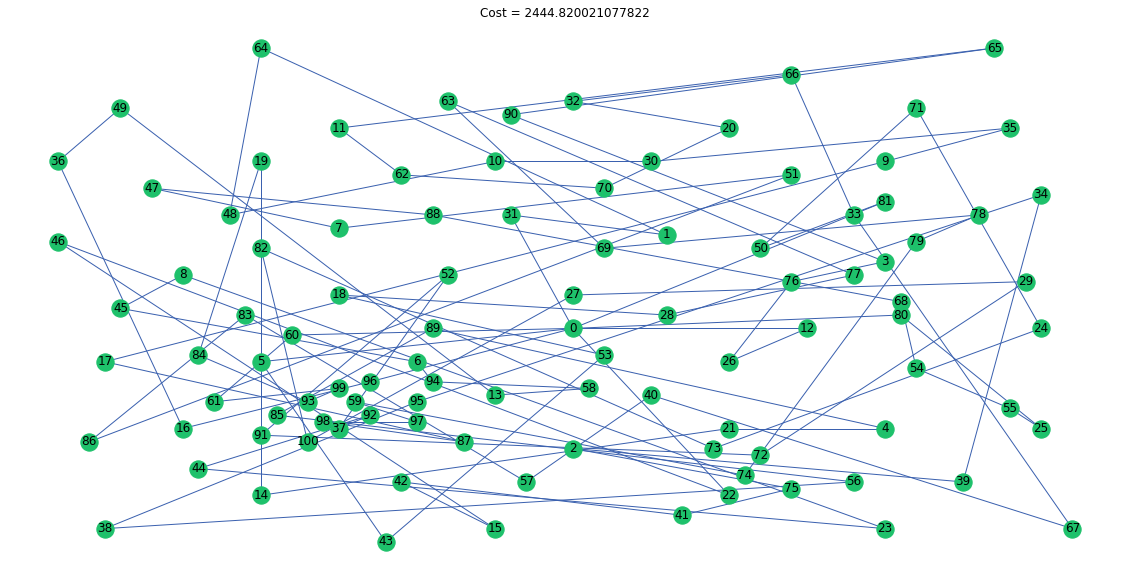

In [3]:
solution = test_triangular(instance_name='P-n101-k4', iterations=100)
solution.plot_routes()

The application of the triangular distribution in the random selection of candidates seems to result in the apparent destruction of the heuristic behind the original process. This is probably because this distribution, while giving more probability to the best candidates, gives too much probability to the worst ones.

## Geometrical Distribution

In [4]:
def rand_biased_geom_savings(instance_name,beta):
    depot, nodes, veh_capacity = read_nodes(instance_name)
    build_initial_edges(depot, nodes)
    savings_list = compute_savings_list(nodes)
    solution = create_dummy_solution(nodes)
    
    while len(savings_list) > 0:
        n = len(savings_list) - 1 
        position = get_random_geometric_position(n, beta)
        candidate = savings_list[position]
        merge_routes(candidate, solution, depot, veh_capacity)
        savings_list.remove(savings_list[position])

    return solution


def test_geometrical(instance_name, beta, iterations):
    best = None
    for i in range(iterations):
        solution = rand_biased_geom_savings(instance_name, beta)
        cost = solution.cost
        try:
            if cost < best.cost:
                best = solution
        except:
            best = solution
        #print('solution_{} --- cost = {}'.format(i, cost))
    return best

### Geometrical distribution $\beta = 0.4$

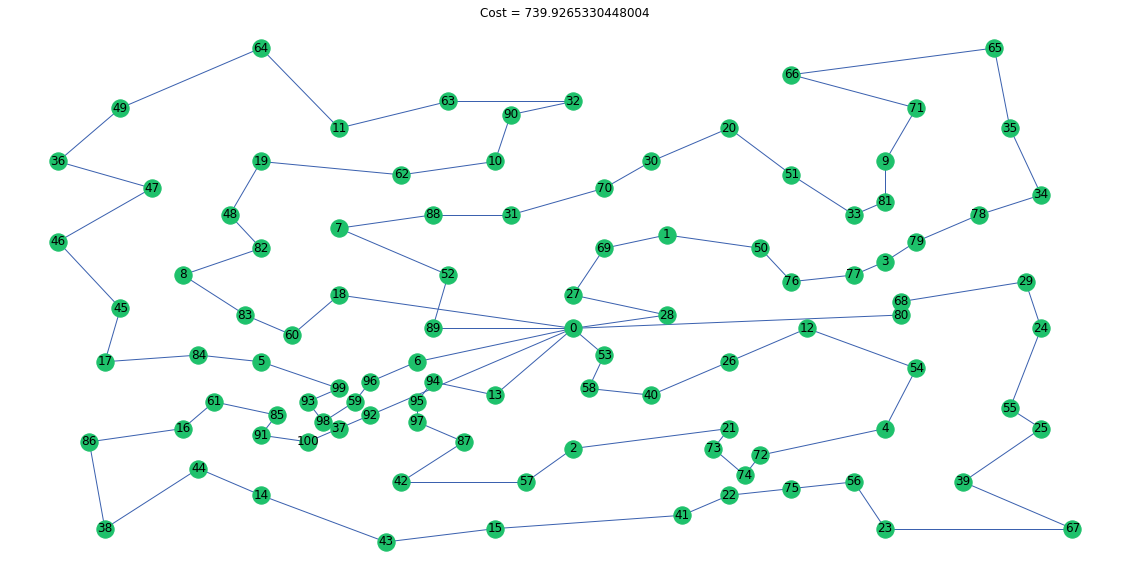

In [5]:
best = test_geometrical(instance_name='P-n101-k4', beta=0.4, iterations=100)
best.plot_routes()

### Geometrical distribution $\beta = 0.3$

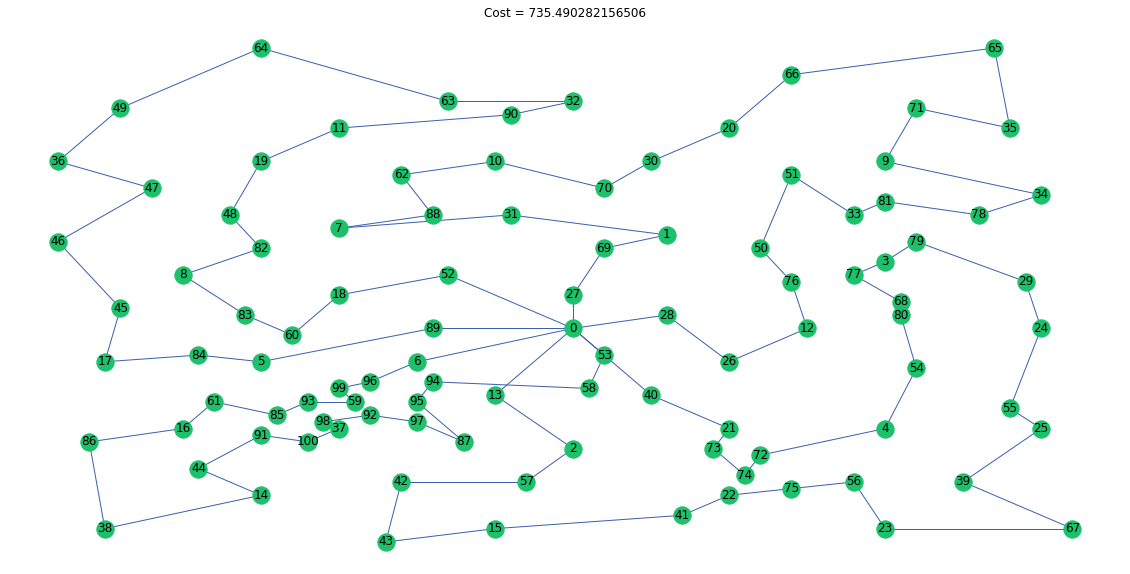

In [6]:
best = test_geometrical(instance_name='P-n101-k4', beta=0.3, iterations=100)
best.plot_routes()

### Geometrical distribution $\beta = 0.2$

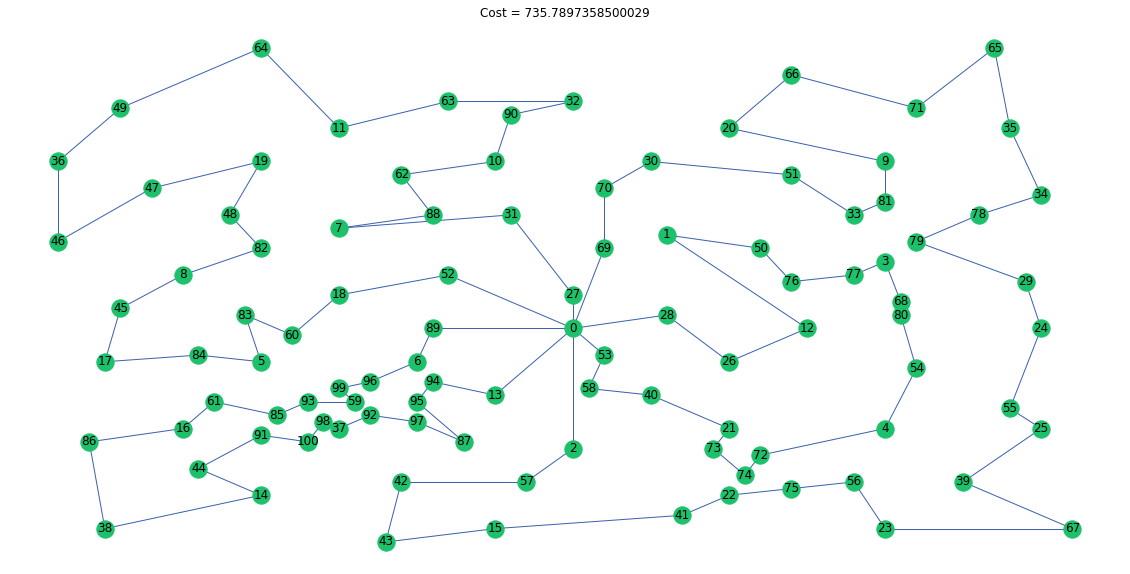

In [7]:
best = test_geometrical(instance_name='P-n101-k4', beta=0.2, iterations=100)
best.plot_routes()

### Geometrical distribution $\beta = 0.1$

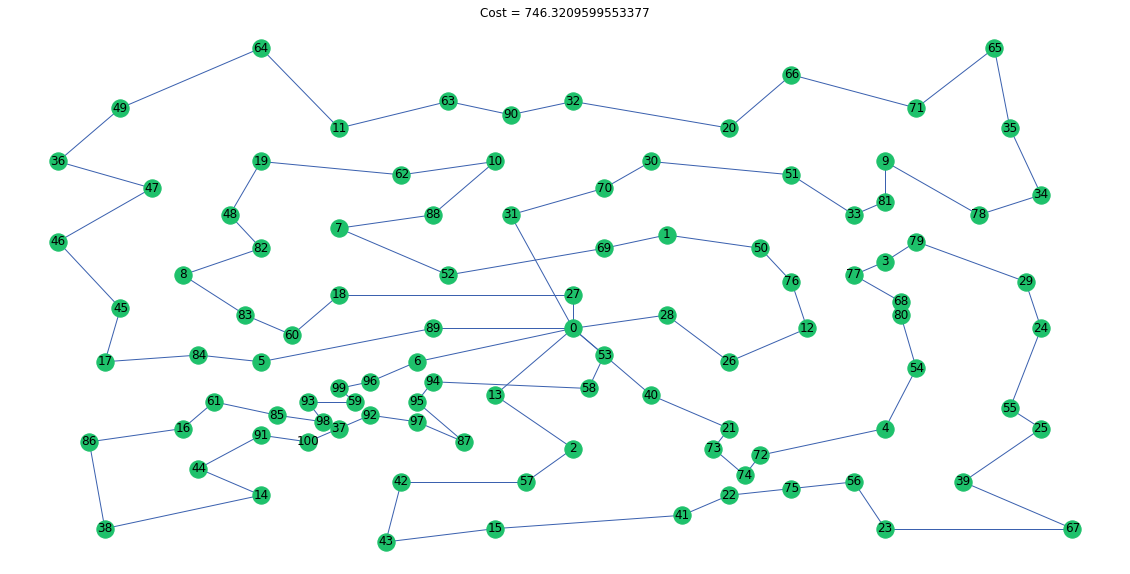

In [8]:
best = test_geometrical(instance_name='P-n101-k4', beta=0.5, iterations=100)
best.plot_routes()

### Monte Carlo $\beta$ selection for Geometrical Distribution 

In [9]:
def test_random_geometrical(instance_name, low, high, iterations):
    low, high = low * 100, high * 100
    best = None
    for i in range(iterations):
        solution = rand_biased_geom_savings(instance_name, np.random.randint(low=low, high=high)/100)
        cost = solution.cost
        try:
            if cost < best.cost:
                best = solution
        except:
            best = solution
        #print('solution_{} --- cost = {}'.format(i, cost))
    return best

In [10]:
solution = test_random_geometrical(instance_name='P-n101-k4', low=0.2, high=0.45, iterations=100)

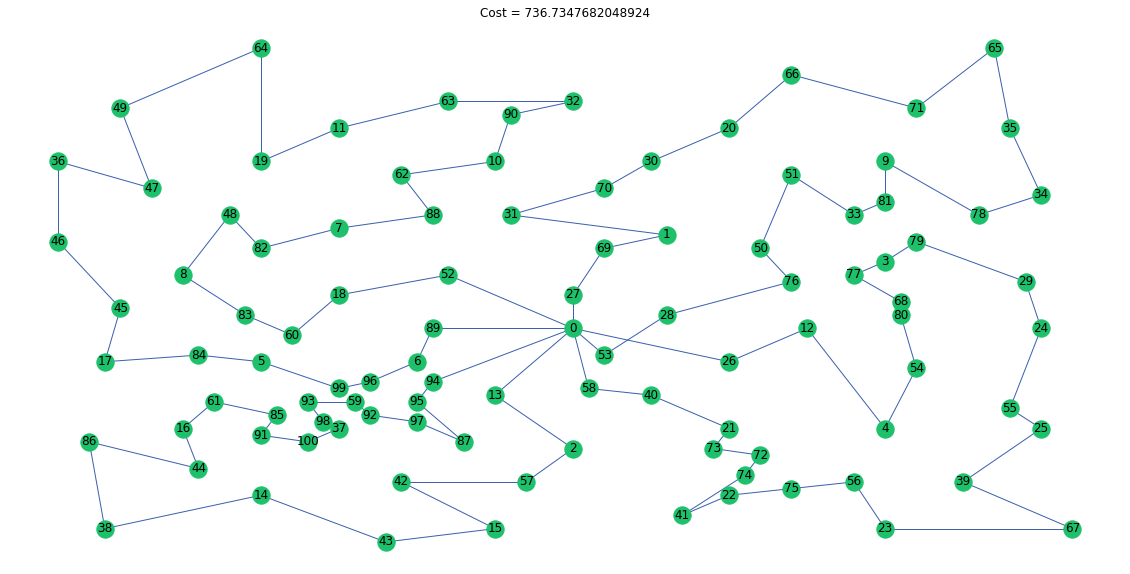

In [11]:
solution.plot_routes()